In [ ]:
# INSTITUTO CARLOS III POR COMUNIDADES AUTONOMAS

In [1]:
# Leemos el conjunto de datos por comunidades autonomas
from pandas import read_csv
lectura = read_csv('casos_tecnica_ccaa.csv', encoding='latin-1', sep = ',', index_col = 1)

In [2]:
import pandas as pd
df = pd.DataFrame(lectura)

In [3]:
df.size

59850

In [16]:
df['ccaa_iso' == 'MU'].value_counts()

KeyError: False

In [4]:
# Vamos a eliminar del dataframe todas aquellas filas en las que los casos totales sean 0
# De esta forma contabilizamos para cada ccaa el numero de casos a partir del inicio de la 
# pandemia en la propia ccaa
df.dropna(axis = 0, inplace = True)
df_casos_mayor_cero = df[df['num_casos'] != 0]

In [ ]:
df.head(10)

In [ ]:
df_casos_mayor_cero.values

In [11]:
# No se que problema ocurre con 'MU'. Tambien hay otros ccaa_iso que no me los reconoce
# como por ejemplo 'A' o 'AL' así que voy a ver como tratar los datos, por ejemplo, con Madrid
# y cuando solucione el problema ya lo tengo hecho
df_MD = df_casos_mayor_cero[df_casos_mayor_cero['ccaa_iso'] == 'MD']

In [12]:
df_MD.head(5)

,ccaa_iso,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
fecha,,,,,,,
2020-01-01,MD,1,1,0,0,0,0
2020-01-10,MD,1,1,0,0,0,0
2020-01-11,MD,1,1,0,0,0,0
2020-01-12,MD,1,1,0,0,0,0
2020-01-13,MD,2,2,0,0,0,0


In [6]:
df_MD_casos = df_MD['num_casos']

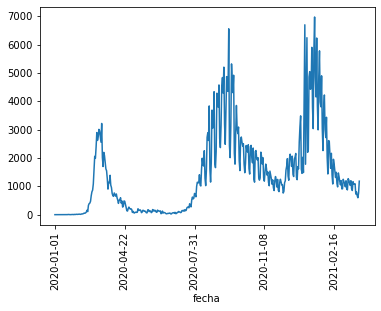

In [7]:
# Visualización de los datos con un plot simple
from matplotlib import pyplot
df_MD_casos.plot()
# Rotamos 45º las fechas para que se vean correctamente
pyplot.xticks(rotation=90)
pyplot.show()

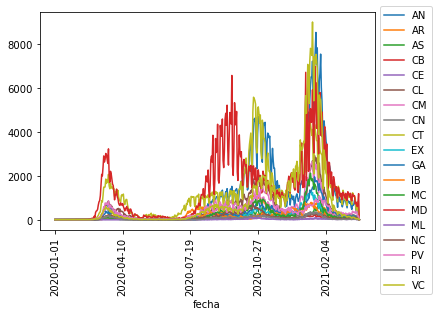

In [8]:
from matplotlib.pyplot import legend
# Agrupamos por CCAA y mostramos la serie dada por 'num_casos'
# df.groupby(by=grouping_columns)[columns_to_show].function()
df.groupby(['ccaa_iso'])['num_casos'].plot()
# Pintamos la leyenda fuera de la zona grafica
legend(bbox_to_anchor=(1, 1.05))
pyplot.xticks(rotation=90)
pyplot.show()